**Features in dataset**
ID - Shows a unique identificator of a customer.

Sex - Biological sex (gender) of a customer. In this dataset there are only 2 different options.
0 male
1 female

Marital status- Marital status of a customer.
0 single
1 non-single (divorced / separated / married / widowed)

Age - The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset
18 Min value (the lowest age observed in the dataset)
76 Max value (the highest age observed in the dataset)

Education - Level of education of the customer
0 other / unknown 1 high school 2 university
3 graduate school

Income - Self-reported annual income in US dollars of the customer. 35832 Min value (the lowest income observed in the dataset)
309364 Max value (the highest income observed in the dataset)

Occupation - Category of occupation of the customer.
0 unemployed / unskilled
1 skilled employee / official 2 management / self-employed / highly qualified employee / officer

Settlement size - The size of the city that the customer lives in.
0 small city
1 mid-sized city
2 big city

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('segmentation data.csv')

In [3]:
dataset.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
dataset.shape

(2000, 8)

 ## Exploratory Data Analysis


<AxesSubplot:xlabel='Income', ylabel='Count'>

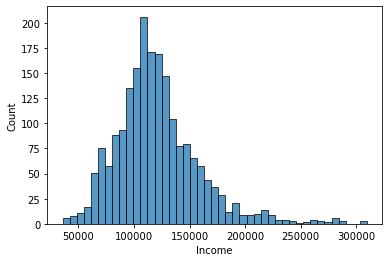

In [6]:
sns.histplot(data=dataset,x="Income")

<AxesSubplot:xlabel='Age', ylabel='Count'>

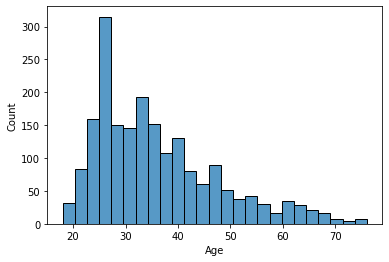

In [7]:
sns.histplot(dataset,x="Age")

<AxesSubplot:xlabel='Age', ylabel='Income'>

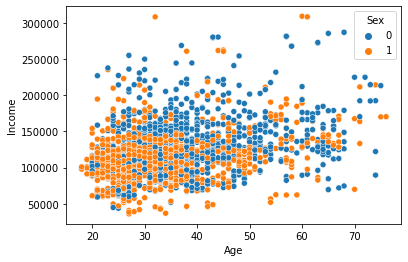

In [8]:
sns.scatterplot(x="Age",y="Income",data=dataset,hue="Sex")

<AxesSubplot:>

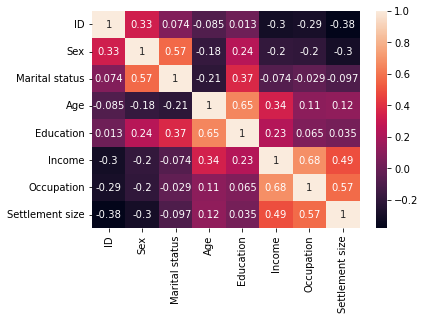

In [9]:
sns.heatmap(dataset.corr(),annot=True)

## Data PreProcessing


In [10]:
dataset.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [11]:
dataset.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [12]:
dataset.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [13]:
dataset.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


# K-means clustering

In [14]:
from sklearn.cluster import KMeans

## Segmentation using occupation and income

In [15]:
x=dataset[["Age","Income"]]
x.head()

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031


#### Model 1.  with k = 3

In [16]:
k_means = KMeans(n_clusters=3,random_state = 42)  # it divides 2000 data into 3 categories so its giving labels in 0 1 2
k_means.fit(x)

KMeans(n_clusters=3, random_state=42)

In [17]:
#To get cluster centers
k_means.cluster_centers_

array([[3.79341518e+01, 1.32208323e+05],
       [3.19539843e+01, 9.08833154e+04],
       [4.39342723e+01, 1.99404446e+05]])

In [18]:
labels = k_means.labels_
labels

array([0, 0, 1, ..., 1, 1, 1])

#### Visualizing the clusters

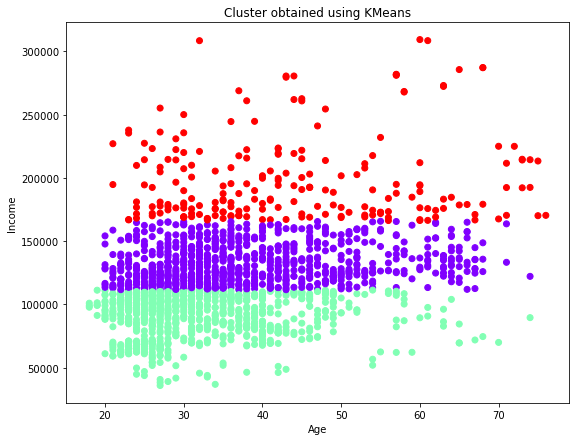

In [19]:
plt.figure(figsize = (9,7))
plt.scatter(x["Age"],x["Income"],c=k_means.labels_,cmap='rainbow')
plt.title("Cluster obtained using KMeans")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

#### Visualizing the clusters with their centroids

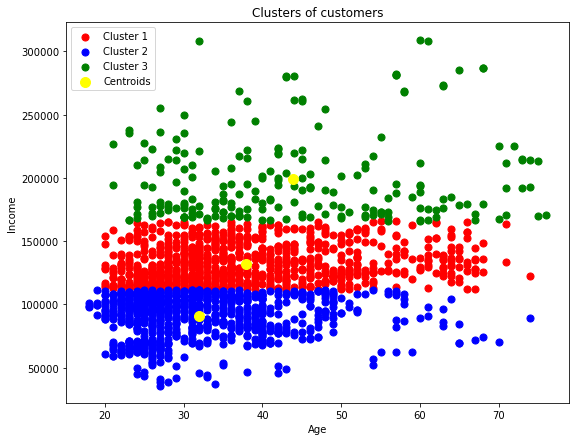

In [20]:
plt.figure(figsize = (9,7))
plt.scatter(x.values[labels == 0, 0], x.values[labels == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(x.values[labels == 1, 0], x.values[labels == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x.values[labels == 2, 0], x.values[labels == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [21]:
#### Model 2. with k = 5

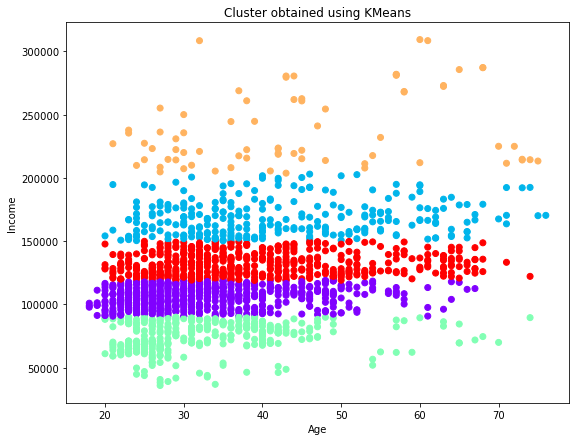

In [23]:
k_means_5 = KMeans(n_clusters=5,random_state = 42)
k_means_5.fit(x)
plt.figure(figsize = (9,7))
plt.scatter(dataset["Age"],dataset["Income"],c=k_means_5.labels_,cmap='rainbow')
plt.title("Cluster obtained using KMeans")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

### Finding the optimal value of k

#### 1. Elbow Method

In [24]:
inertia = []
for i in range(1 , 15):
    k_means = (KMeans(n_clusters = i) )
    k_means.fit(x)
    inertia.append(k_means.inertia_)

In [25]:
inertia

[2903113028798.3164,
 1214580023983.076,
 673043676832.6609,
 377123886506.13525,
 248987937927.16394,
 176999411031.5077,
 129547223545.96376,
 96402747481.44856,
 78684370075.25542,
 64669117386.79373,
 53932936074.83309,
 44792834243.32537,
 38464731821.37927,
 33539629436.029106]

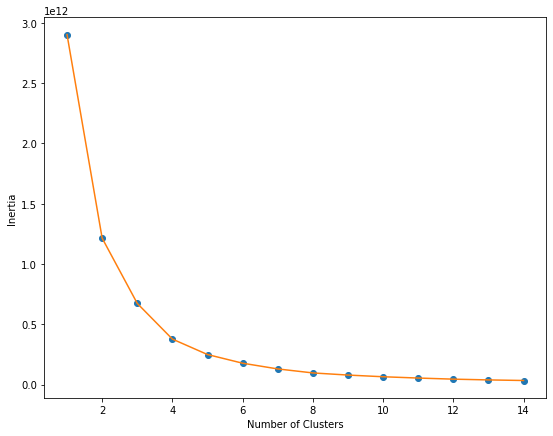

In [26]:
plt.figure(figsize = (9 ,7))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

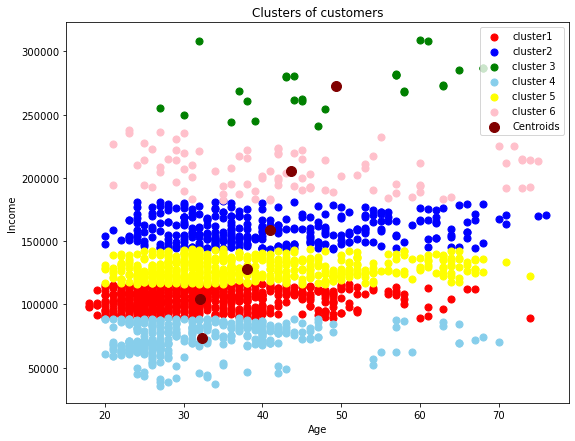

In [27]:
k_means_6 = KMeans(n_clusters=6,random_state = 42)
k_means_6.fit(x)
labels = k_means_6.labels_

plt.figure(figsize = (9,7))
plt.scatter(x.values[labels == 0, 0], x.values[labels == 0, 1], s = 50, c = 'red', label = 'cluster1')
plt.scatter(x.values[labels == 1, 0], x.values[labels == 1, 1], s = 50, c = 'blue', label = 'cluster2')
plt.scatter(x.values[labels == 2, 0], x.values[labels == 2, 1], s = 50, c = 'green', label = 'cluster 3')
plt.scatter(x.values[labels == 3, 0], x.values[labels == 3, 1], s = 50, c = 'skyblue', label = 'cluster 4')
plt.scatter(x.values[labels == 4, 0], x.values[labels == 4, 1], s = 50, c = 'yellow', label = 'cluster 5')
plt.scatter(x.values[labels == 5, 0], x.values[labels == 5, 1], s = 50, c = 'pink', label = 'cluster 6')

plt.scatter(k_means_6.cluster_centers_[:, 0], k_means_6.cluster_centers_[:, 1], s = 100, c = 'maroon', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

#### 2. Average Silhouette Method

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
s_score=[]
for i in range(2,15):
    k_means=KMeans(n_clusters=i,random_state=42)
    k_means.fit(x)
    avg_silhutte=silhouette_score(x,k_means.labels_)
    s_score.append(avg_silhutte)

In [30]:
s_score=[]
for i in range(2,15):
    k_means=KMeans(n_clusters=i,random_state=42)
    k_means.fit(x)
    avg_silhutte=silhouette_score(x,k_means.labels_)
    s_score.append(avg_silhutte)
    

In [31]:
s_scores = [] 
for i in range(2,15):
    k_means = KMeans(n_clusters=i, random_state = 42)
    k_means.fit(x)
    silhouette_avg = silhouette_score(x, k_means.labels_)
    s_scores.append(silhouette_avg)

In [32]:
s_scores

[0.5834469068936822,
 0.5125390490139897,
 0.5428479099705408,
 0.5401520680025738,
 0.5437793559150387,
 0.5325741477090951,
 0.5402053277830295,
 0.5338224982057904,
 0.534589411550381,
 0.5386040904471684,
 0.5459717582883181,
 0.5448775874880964,
 0.5380818357605142]

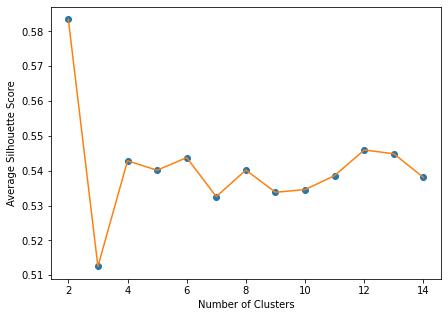

In [33]:
plt.figure(figsize = (7 ,5))
plt.plot(np.arange(2 , 15) , s_scores , 'o')
plt.plot(np.arange(2 , 15) , s_scores , '-')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.show()

In [34]:
# no.of cluster 2

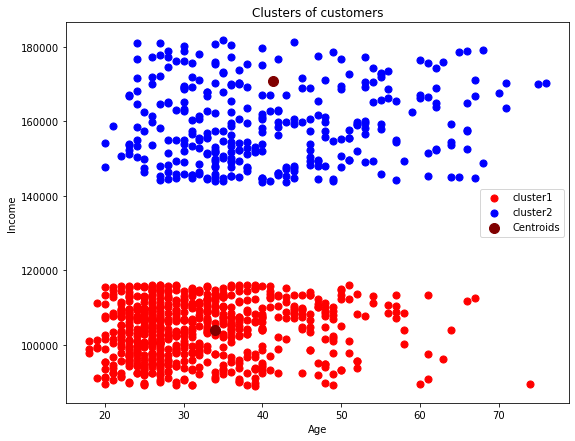

In [35]:
k_means_2 = KMeans(n_clusters=2,random_state = 42)
k_means_2.fit(x)
labels = k_means_6.labels_

plt.figure(figsize = (9,7))
plt.scatter(x.values[labels == 0, 0], x.values[labels == 0, 1], s = 50, c = 'red', label = 'cluster1')
plt.scatter(x.values[labels == 1, 0], x.values[labels == 1, 1], s = 50, c = 'blue', label = 'cluster2')
plt.scatter(k_means_2.cluster_centers_[:, 0], k_means_2.cluster_centers_[:, 1], s = 100, c = 'maroon', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

### Segmentation using Income and  Occupation

In [36]:
x=dataset[["Income","Occupation"]]
x

,Income,Occupation
0,124670,1
1,150773,1
2,89210,0
3,171565,1
4,149031,1
...,...,...
1995,123525,0
1996,117744,1
1997,86400,0
1998,97968,0


In [37]:
inertia = []
for i in range(1, 15):
    k_means = (KMeans(n_clusters = i) )
    k_means.fit(x)
    inertia.append(k_means.inertia_)

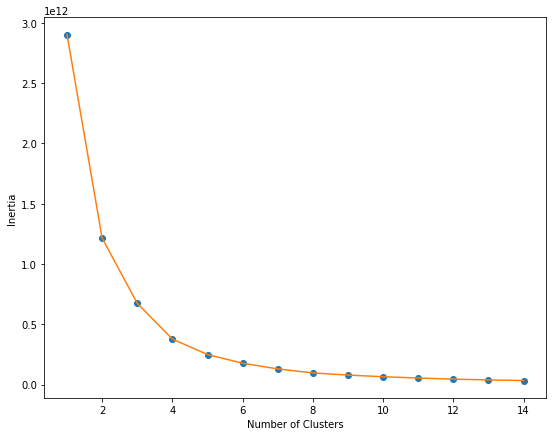

In [38]:
plt.figure(figsize = (9 ,7))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

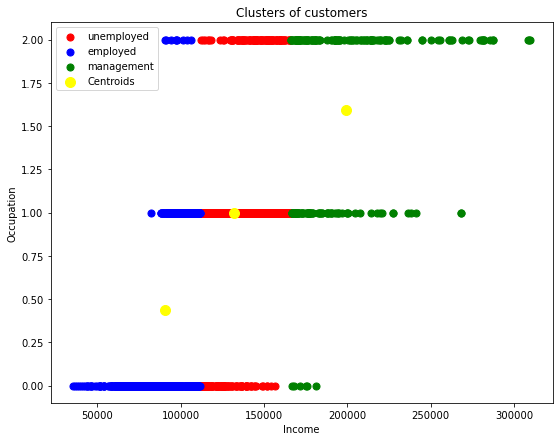

In [39]:
k_means = KMeans(n_clusters=3,random_state = 42)
k_means.fit(x)
labels = k_means.labels_
plt.figure(figsize = (9,7))
plt.scatter(x.values[labels == 0, 0], x.values[labels == 0, 1], s = 50, c = 'red', label = 'unemployed')
plt.scatter(x.values[labels == 1, 0], x.values[labels == 1, 1], s = 50, c = 'blue', label = 'employed')
plt.scatter(x.values[labels == 2, 0], x.values[labels == 2, 1], s = 50, c = 'green', label = 'management')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('Occupation')
plt.legend()
plt.show()

# Hierarchical Clustering

In [44]:
dataset.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [52]:
import scipy.cluster.hierarchy as sch

In [46]:
agglo_5=sch.linkage(x.iloc[:5,:])
agglo_5

array([[1.0000e+00, 4.0000e+00, 1.7420e+03, 2.0000e+00],
       [3.0000e+00, 5.0000e+00, 2.0792e+04, 3.0000e+00],
       [0.0000e+00, 6.0000e+00, 2.4361e+04, 4.0000e+00],
       [2.0000e+00, 7.0000e+00, 3.5460e+04, 5.0000e+00]])

In [47]:
pd.DataFrame(agglo_5,columns=["cluster1","cluster2","distance","new_cluster"])

,cluster1,cluster2,distance,new_cluster
0,1.0,4.0,1742.000000,2.0
1,3.0,5.0,20792.000000,3.0
2,0.0,6.0,24361.000000,4.0
3,2.0,7.0,35460.000014,5.0


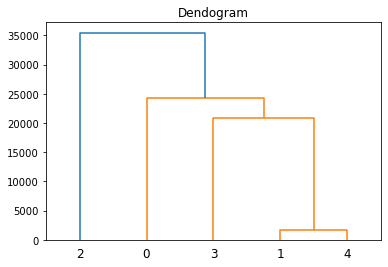

In [48]:
plt.title("Customer Dendrogram")
dend=sch.dendrogram(agglo_5)

#### Using the complete data

In [49]:
agglo_cluster=sch.linkage(x,method="ward")
agglo_cluster

array([[1.86000000e+02, 1.06000000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.19000000e+02, 1.06700000e+03, 0.00000000e+00, 2.00000000e+00],
       [4.95000000e+02, 1.34400000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.99000000e+03, 3.99400000e+03, 7.20508966e+05, 3.46000000e+02],
       [3.99300000e+03, 3.99500000e+03, 1.07566447e+06, 1.65400000e+03],
       [3.99600000e+03, 3.99700000e+03, 1.80420816e+06, 2.00000000e+03]])

In [50]:
agglo_cluster.shape

(1999, 4)

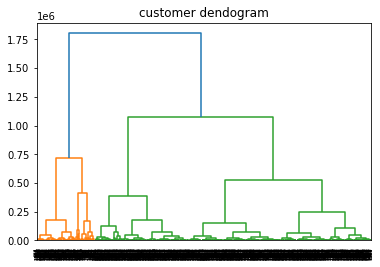

In [53]:
plt.title("customer dendogram")
dend=sch.dendrogram(sch.linkage(x,method="ward"))

In [ ]:
#optimal number of cluster is 2